# <span style="color:#F72585"><center>ICA: Análisis de componentes independientes</center></span>



<figure>
<center>
<img src="../Imagenes/Clerodendrum_Thomsoniae_Flower.jpg" width="600" height="400" align="center" /> 
</center>   
</figure>

Fuente: <a href="https://commons.wikimedia.org/wiki/File:Clerodendrum_Thomsoniae_Flower.jpg">Efendi Slamet</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via Wikimedia Commons


## <span style="color:#4361EE">Referencias</span>

1. Aapo Hyvärinen and Erkki Oja, *Independent Component Analysis: Algorithms and Applications*. Unpublished paper.
1.  Aapo Hyvärinen, Juha Karhunen and Erkki Oja, *Independent Component Analysis*, John Wiley and sons, 2001.

## <span style="color:#4361EE">Introducción</span>

ICA es un tipo de algoritmo de reducción de dimensionalidad que transforma un conjunto de variables en un nuevo conjunto de componentes; lo hace de tal manera que se maximiza la independencia estadística entre los nuevos componentes. Esto es similar al [análisis de componentes principales](rd_0030_PCA_Reg_Logit.ipynb) (ACP), que asigna una colección de variables a componentes estadísticamente no correlacionados, excepto que ICA va un paso más allá al maximizar la independencia estadística en lugar de solo desarrollar componentes que no están correlacionados.

Al igual que otros métodos de reducción de dimensionalidad, ICA busca reducir la cantidad de variables en un conjunto de datos, al tiempo que conserva la información clave. 

En el ejemplo que presentamos en esta lección, las variables representan píxeles en una imagen. Una de las motivaciones detrás del uso de ICA en imágenes es realizar la compresión de imágenes, es decir, en lugar de almacenar miles o incluso millones de píxeles en una imagen, el almacenamiento de los componentes independientes ocupa mucha menos memoria. 

Además, por su naturaleza, ICA extrae los componentes independientes de las imágenes, lo que significa que encontrará las curvas y los bordes dentro de una imagen. Por ejemplo, en el reconocimiento facial, ICA identificará los ojos, la nariz, la boca, etc. como componentes independientes.

## <span style="color:#4361EE">Motivación</span> 

Imagina que estás en una habitación donde dos personas están hablando simultáneamente. Tienes dos micrófonos, que
mantienes en diferentes lugares. Los micrófonos te dan dos señales de tiempo grabadas, que podríamos denotar por
$x_1(t)$ y $x_2(t)$, siendo $x_1$ y $x_2$ las amplitudes, y t el índice de tiempo. Cada una de estas señales grabadas es una suma ponderada de las señales de voz emitidas por los dos hablantes, que denotamos por $s_1(t)$ y $s_2(t)$. Podríamos expresar esto como una ecuación lineal

$$
\begin{align}
x_1(t) &= a_{11}s_1(t) + a_{12}s_2(t)\\
x_2(t) &= a_{21}s_1(t) + a_{22}s_2(t)
\end{align}
$$

donde $a_{11},a_{12},a_{21}$ y $a_{22}$ son algunos parámetros que dependen de las distancias de los micrófonos a los altavoces. Sería muy útil si ahora pudiera estimar las dos señales de voz originales $s_1(t)$ y $s_2(t)$, usando solo las señales grabadas $x_1(t)$ y $x_2(t)$. Esto se llama el problema del cóctel.

<figure>
<center>
<img src="../Imagenes/Web_Summit_2018.jpg" width="600" height="400" align="center" /> 
</center>   
</figure>

Fuente: <a href="https://commons.wikimedia.org/wiki/File:Web_Summit_2018_-_Surf_Summit_Surf_Summit_2018_(45712681781).jpg">Web Summit</a>, <a href="https://creativecommons.org/licenses/by/2.0">CC BY 2.0</a>, via Wikimedia Commons

El siguienter gráfico muestra las mezclas de señales a la izquierda y el gráfico de densidad conjunta correspondiente a la derecha. Es decir, en un instante dado, el valor de la señal superior es el primer componente de x, y el valor de la señal inferior es el segundo componente correspondiente. Entonces, la gráfica de la derecha se construye simplemente trazando cada uno de esos puntos x. Las densidades marginales también se muestran en el borde de la parcela.

<figure>
<center>
<img src="../Imagenes/ica_01.jpg" width="600" height="400" align="center" /> 
</center>   
</figure>

Fuente: 


## <span style="color:#4361EE"> Definición de ICA</span>

Para definir rigurosamente ICA (Jutten y Hérault, 1991; Comon, 1994), podemos utilizar una **variable latente** estadística
modelo.

Supongamos que observamos $n$ mezclas lineales $x_1,\ldots,x_n$ de $n$ componentes independientes

$$
x_j = a_{j1}s_1 + a_{j2}s_2 +\cdots +a_{jn}s_n, \text{ para todo } j
$$



Ahora hemos eliminado el índice de tiempo $t$; en el modelo ICA, asumimos que cada mezcla $x_j$ así como cada
el componente independiente $s_k$ es una variable aleatoria, en lugar de una señal de tiempo adecuada.

Los valores observados $x_j(t)$, por ejemplo, las señales del micrófono en el problema del cóctel, son entonces una muestra de esta variable aleatoria. 

Sin pérdida de generalidad, podemos suponer que tanto las variables de mezcla como los componentes independientes tienen media cero. Si esto no es cierto, entonces las variables observables $x_i$ siempre se pueden centrar restando la media muestral, lo que hace que el modelo sea de media cero. 

Es conveniente utilizar la notación matricial vectorial en lugar de las sumatorias como en la ecuación anterior. Denotemos por $\boldsymbol{x}$ el vector aleatorio cuyos elementos son las mezclas $x_1,\ldots,x_n$, y también por $\boldsymbol{s}$ el vector aleatorio con elementos $s_1,\ldots,s_n$. Denotemos por $\boldsymbol{A}$ la matriz con elementos $a_{ij}$.

El modelo de mezcla anterior se escribe como
$$
\boldsymbol{x} = \boldsymbol{As}.
$$

A veces necesitamos las fila de la matriz $\boldsymbol{A}$; denotándolos por $\boldsymbol{a}_i$, el modelo también se puede escribir como

$$
x_i = \sum_{j=1}^{n}a_{ij}s_j
$$


El modelo estadístico de la última ecuación se denomina análisis de componentes independientes o modelo ICA. El modelo `ICA es un
modelo generativo`, lo que significa que describe cómo se generan los datos observados mediante un proceso de mezcla de
componentes $s_i$.


Los componentes independientes son variables latentes, lo que significa que no se pueden observar directamente. También se supone que la matriz de mezcla es desconocida. Todo lo que observamos es el vector aleatorio $\boldsymbol{x}$, y debemos estimar tanto $\boldsymbol{A}$ como $\boldsymbol{s}$.

Esto debe hacerse bajo supuestos tan generales como sea posible. El punto de partida para ICA es la hipótesis muy simple de que **los componentes** $s_i$ **son estadísticamente independientes**.

### <span style="color:#4CC9F0">¿Por qué están prohibidas las variables gaussianas? </span>

La restricción fundamental en ICA es que los componentes independientes no deben ser gaussianos para que ICA sea posible.
Para ver por qué las variables gaussianas hacen que ICA sea imposible, suponga que la matriz de mezcla es ortogonal y las $s_i$'s'
son gaussianas. Entonces $x_1$ y $x_2$ son gaussianas, no correlacionadas y de varianza unitaria.

La densidad en tal caso es completamente simétrica. Por lo tanto, no contiene ninguna información sobre las direcciones de las columnas de la matriz de mezcla $\boldsymbol{A}$. Esta es la razón por la cual $\boldsymbol{A}$ no se puede estimar.

Más rigurosamente, se puede probar que la distribución de cualquier transformación ortogonal de la gaussiana $(x_1,x_2)$
tiene exactamente la misma distribución que $(x_1,x_2)$, y que $x_1$ y $x_2$ son independientes.

## <span style="color:#4361EE">Pasos de un algoritmo ICA</span>

Un primer paso en muchos algoritmos ICA es blanquear (esferar) los datos. Esto significa que eliminamos cualquier correlación en los datos, con lo que las señales se ven obligadas a no estar correlacionadas. 

Poniendo las palabras en términos matemáticos, buscamos una transformación lineal $\boldsymbol{V}$ tal que cuando $\boldsymbol{y} = \boldsymbol{Vx}$ ahora tenemos $E[\boldsymbol{yy}^T] = \boldsymbol{I}$. 

Esto se logra fácilmente configurando $\boldsymbol{V} = \boldsymbol{C}^{-1/2}$, donde $\boldsymbol{C} = E[\boldsymbol{xx}^T]$ es la matriz de correlación de los datos, ya que entonces tenemos $E[\boldsymbol{yy}^t] = E[\boldsymbol{Vxx}^T\boldsymbol{V}^T] = \boldsymbol{C}^{-1/2}\boldsymbol{CC}^{-1/2} = I$.

La siguiente figura muestra las señales y y la densidad conjunta $p(y)$ después de tal operación.

<figure>
<center>
<img src="../Imagenes/ica_02.jpg" width="600" height="400" align="center" /> 
</center>   
</figure>

Fuente: 


Después de la formación de esferas, las señales separadas se pueden encontrar mediante una transformación ortogonal de las señales blanqueadas y (esto es simplemente una rotación de la densidad conjunta). La rotación adecuada se busca maximizando la no normalidad de las densidades marginales (que se muestran en los bordes del gráfico de densidad). Esto se debe al hecho de que una mezcla lineal de variables aleatorias independientes es necesariamente más gaussiana que las variables originales. (Este es el mismo fenómeno que establece el teorema del límite central). Esto implica que en ICA debemos restringirnos a una señal de fuente gaussiana como máximo.

Hay muchos algoritmos para realizar ICA, pero el más eficiente hasta la fecha es $FastICA$, algoritmo que fue desarrollado por Hyvärinen,  Karhunen y  Oja. La siguiente gráfica muestra el resultado después de varios pasos del algoritmo FastICA.

Para obtener detalles matemáticos y computacionales, consulte las referencias 1 y 2.

<figure>
<center>
<img src="../Imagenes/ica_03.jpg" width="300" height="400" align="left" /> 
<img src="../Imagenes/ica_04.jpg" width="300" height="400" align="center" />
<img src="../Imagenes/ica_05.jpg" width="300" height="400" align="right" />
</center>   
</figure>

Fuente: 

## <span style="color:#4361EE">fastICA con Python</span>

Primero, carguemos los paquetes que necesitaremos. La funcionalidad principal que queremos es el método FastICA disponible en sklearn.decomposition. También cargaremos el paquete skimage, que usaremos para leer una imagen de muestra, y pylab, que mostrará la imagen en la pantalla.

A continuación, leemos en la imagen. Estableceremos el parámetro, as_grey, igual a True. Esto hará que cada píxel de la imagen tenga un valor entre 0 y 255, en lugar de un valor RGB tridimensional.

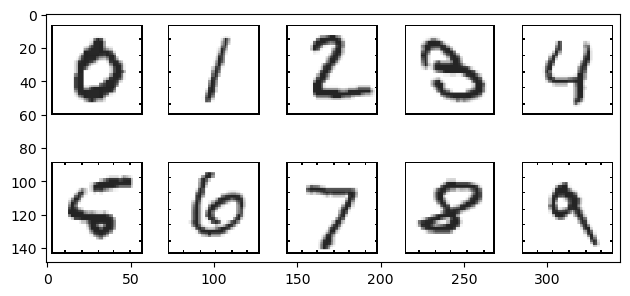

In [28]:
from sklearn.decomposition import FastICA
from pylab import *
import matplotlib.pyplot as plt
from skimage import data, io, color

#lees los datos y muestra la imagen
path ="../Imagenes/digits.png"
foto_image = io.imread(path, as_gray = True)
io.imshow(foto_image)
plt.show()

Ahora, elegimos una cantidad de componentes que queremos y usamos esa cantidad para crear un objeto FastICA. En el ejemplo a continuación, crearemos un objeto FastICA con 10 componentes. Esto nos permitirá ejecutar ICA en nuestra imagen, lo que dará como resultado 10 componentes independientes.

In [30]:
n_components = 10
ica = FastICA(n_components = n_components,max_iter=10000, whiten='unit-variance')

# corre ICA para la imagen
ica.fit(foto_image)

FastICA(max_iter=10000, n_components=10, whiten='unit-variance')

Una prueba importante al hacer cualquier tipo de reducción de dimensionalidad para probar cuánta información se ha perdido. En nuestro ejemplo, reconstruiremos la imagen con los componentes independientes, es decir, ¿cómo se ve la imagen si solo conocemos los 10 componentes independientes que hemos desarrollado?

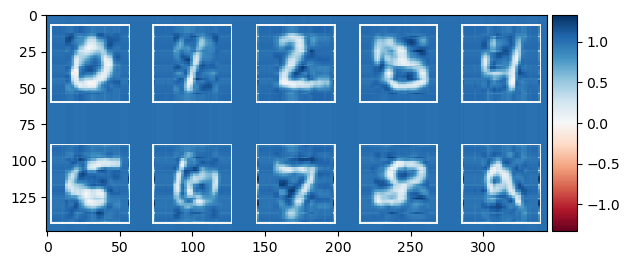

In [36]:
# reconstruct image with independent components
foto_image_ica = ica.fit_transform(foto_image)

foto_image_restored = ica.inverse_transform(foto_image_ica)
 
# show image to screen
io.imshow(foto_image_restored)
plt.show()

Hagamos ahora la recostrucción si usamos 50 componentes independientes.

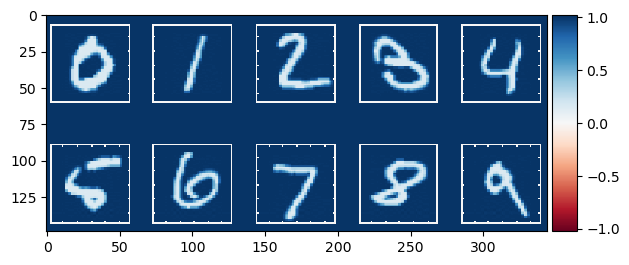

In [44]:
n_components = 50
ica = FastICA(n_components = n_components,max_iter=10000,whiten='unit-variance')
# reconstruct image with independent components
foto_image_ica = ica.fit_transform(foto_image)
foto_image_restored = ica.inverse_transform(foto_image_ica)
 
# show image to screen
io.imshow(foto_image_restored)
show()

In [45]:
len(foto_image)

149

Finalmente veamos la representación de la imagen en sus componentes independientes.

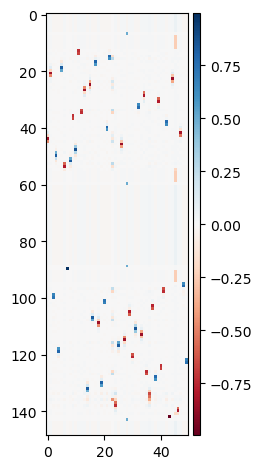

In [19]:
# muestra la imagen reducida
io.imshow(foto_image_ica)
show()

## <span style="color:#4361EE">Aplicaciones a Electroencefalografía</span>

Basado en [Independent Component Analysis (ICA), Shawhin Talebi](https://towardsdatascience.com/independent-component-analysis-ica-a3eba0ccec35)

### <span style="color:red">**Tarea**</span>

Documentar cada línea de código de la siguiente aplicación.

In [173]:
import h5py
with h5py.File('../Datos/EEG_data.mat', 'r') as f:
    print(f.keys())
    data = f['Data'][:].T

<KeysViewHDF5 ['Data']>


In [174]:
data.shape

(10001, 64)

In [175]:
import matplotlib.pyplot as plt

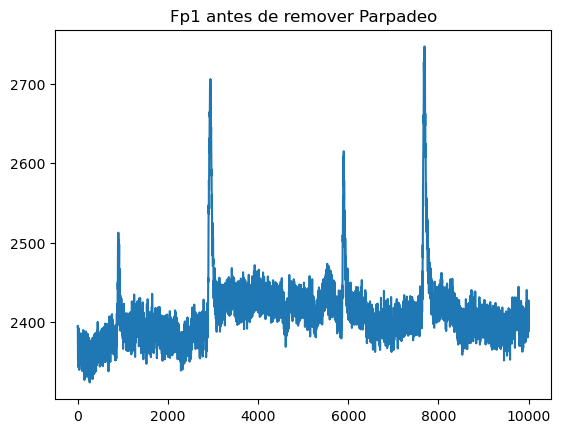

In [176]:
plt.plot(data[:,0])
plt.title('Fp1 antes de remover Parpadeo');

In [189]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
# Separa las variables (características)
x = data.copy()
# Instancia un escalador estándar
scaler = StandardScaler()
# Estandariza las caractersiticas
x = scaler.fit_transform(x)
# visualiza los datos
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-0.362784,0.182904,-0.371285,-0.434231,-1.658346,-1.705161,-0.930909,-0.085866,-0.602488,1.464833,...,-1.728351,1.480079,0.365108,0.563518,0.382632,0.231905,-1.255966,-1.455526,1.550422,1.502441
1,-0.333166,0.309105,-0.221612,-0.360450,-1.397808,-1.623543,-0.668511,0.288056,-0.137023,1.697147,...,-1.639775,1.491328,1.174960,0.914031,0.637614,0.345506,-1.224105,-1.432755,1.737849,1.926525
2,-0.637916,-0.062130,-0.361792,-0.654785,-1.417312,-1.380047,-0.911576,0.152426,-0.467184,1.508463,...,-1.800590,0.739726,0.784575,0.366651,0.613671,0.186015,-1.457416,-1.367640,1.569396,1.442001
3,-1.060772,-0.613151,-0.806406,-1.077282,-1.930947,-1.428817,-1.634156,-0.631273,-1.305917,1.072990,...,-2.107858,-0.095702,-0.210295,-0.612204,0.353286,-0.258486,-1.788510,-1.492051,1.036074,0.612763
4,-1.221585,-0.895169,-0.953983,-1.280279,-2.061723,-1.367265,-1.809427,-0.854862,-1.502519,0.986455,...,-2.141725,-0.719146,-0.193545,-0.967953,0.200358,-0.511315,-1.949588,-1.286271,0.877170,0.276456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,-0.276291,-0.166870,0.983341,0.390967,-0.163665,1.101334,-0.359179,-0.020401,0.539744,-0.881315,...,1.059411,-0.973011,-0.023805,-0.210801,-0.573639,-0.637156,0.740151,-0.134882,0.402579,-2.466344
9997,0.126530,0.549570,1.114711,0.693158,-0.044501,0.784146,-0.069435,0.320487,0.898062,-0.749285,...,1.259217,0.362668,-0.052340,0.532350,-0.464116,-0.437736,1.124358,-0.352998,0.599556,-1.814195
9998,0.439248,0.937207,1.142763,0.828124,0.163727,0.545505,0.077345,0.464711,0.914508,-0.678503,...,1.349299,1.381169,0.647026,0.718868,-0.379195,-0.318496,1.353712,-0.652579,0.675637,-1.423318
9999,0.370258,0.793726,1.188179,0.932234,0.224380,0.676536,0.034099,0.394479,0.705530,-0.709282,...,1.301646,1.027291,0.924743,0.375295,-0.430815,-0.336283,1.281940,-0.676745,0.571594,-1.605326


In [178]:
from sklearn.decomposition import PCA
n_components=21
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = [f'C{i}' for i in range(1,n_components+1)])
principalDf

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21
0,3.495847,-7.144367,2.647203,0.503103,0.627598,-2.363130,1.564903,0.121141,0.261896,0.473963,...,0.612024,0.181553,0.155584,-0.660841,-0.876908,0.001840,-0.146847,0.296281,-0.783574,0.098364
1,4.797601,-6.493636,3.026678,-0.160312,0.700802,-2.403137,1.659420,-0.188343,-0.047939,0.661245,...,0.979591,0.387507,0.007195,-0.136893,-0.827339,0.020727,-0.206064,0.324969,-0.978750,-0.067327
2,3.788485,-6.922187,1.538707,0.320423,0.806598,-2.472526,1.516598,-0.091156,-0.096276,0.648810,...,0.946034,0.500450,0.078181,0.121865,-0.628834,-0.043236,-0.277931,0.274767,-0.939018,-0.111894
3,0.818308,-8.597060,-0.187701,1.424478,0.840624,-2.278113,1.325676,-0.058291,0.148369,0.489378,...,0.761967,0.370165,0.293868,-0.228278,-0.232774,-0.058792,-0.191987,0.176679,-0.846514,-0.140259
4,0.110754,-8.951875,-1.552320,1.825789,1.123749,-1.926901,1.234068,-0.306280,0.288606,0.308383,...,0.898941,0.329026,0.287946,-0.484541,-0.151771,-0.002220,-0.227508,0.094596,-0.781481,-0.126079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,-6.286666,4.740008,-0.955961,-1.024694,3.690026,0.370870,1.162583,1.974923,-0.286919,0.151440,...,-0.426226,0.183772,-0.118581,-0.011235,-0.145546,-0.272370,0.261411,0.373653,0.570988,-0.168493
9997,-4.904594,5.359369,1.817059,-1.646982,3.061079,0.135830,1.156984,1.840894,-0.449799,0.136680,...,-0.487906,-0.069992,-0.145712,-0.319939,-0.017479,-0.284946,0.192395,0.488314,0.629094,-0.121195
9998,-4.099899,5.597763,4.064086,-2.037981,2.637110,0.249564,1.137240,1.616779,-1.041753,0.480001,...,-0.236153,0.148240,-0.058029,-0.074646,-0.029078,-0.162290,0.116785,0.570504,0.546629,0.028421
9999,-4.193581,5.653575,3.606440,-1.662150,2.723186,0.224822,1.087620,1.607595,-1.376243,0.845292,...,-0.101553,0.574528,-0.088454,0.434943,-0.042847,-0.067251,0.131172,0.603545,0.641863,-0.059024


[37.790737 72.559105 82.22039  87.66361  91.02419  92.89264  94.04241
 94.82825  95.568924 96.15128  96.538475 96.894394 97.21015  97.479965
 97.706604 97.92489  98.12044  98.27742  98.408966 98.53064  98.640366]


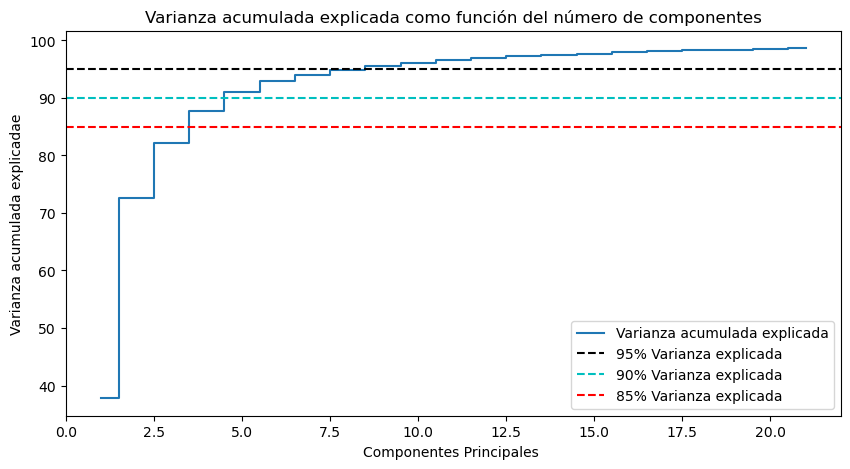

In [179]:
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)*100
print(cum_var_exp)
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.step(range(1, 22), cum_var_exp, where='mid',label='Varianza acumulada explicada')
plt.title('Varianza acumulada explicada como función del número de componentes')
plt.ylabel('Varianza acumulada explicadae')
plt.xlabel('Componentes Principales ')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Varianza explicada')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Varianza explicada')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Varianza explicada')
plt.legend(loc='best')
plt.show()

In [181]:
n_components = 21
ica = FastICA(n_components = n_components,max_iter=10000, whiten='unit-variance')
data_ica = ica.fit_transform(principalDf)
data_ica_sq = data_ica**2

In [182]:
data_ica.shape

(10001, 21)

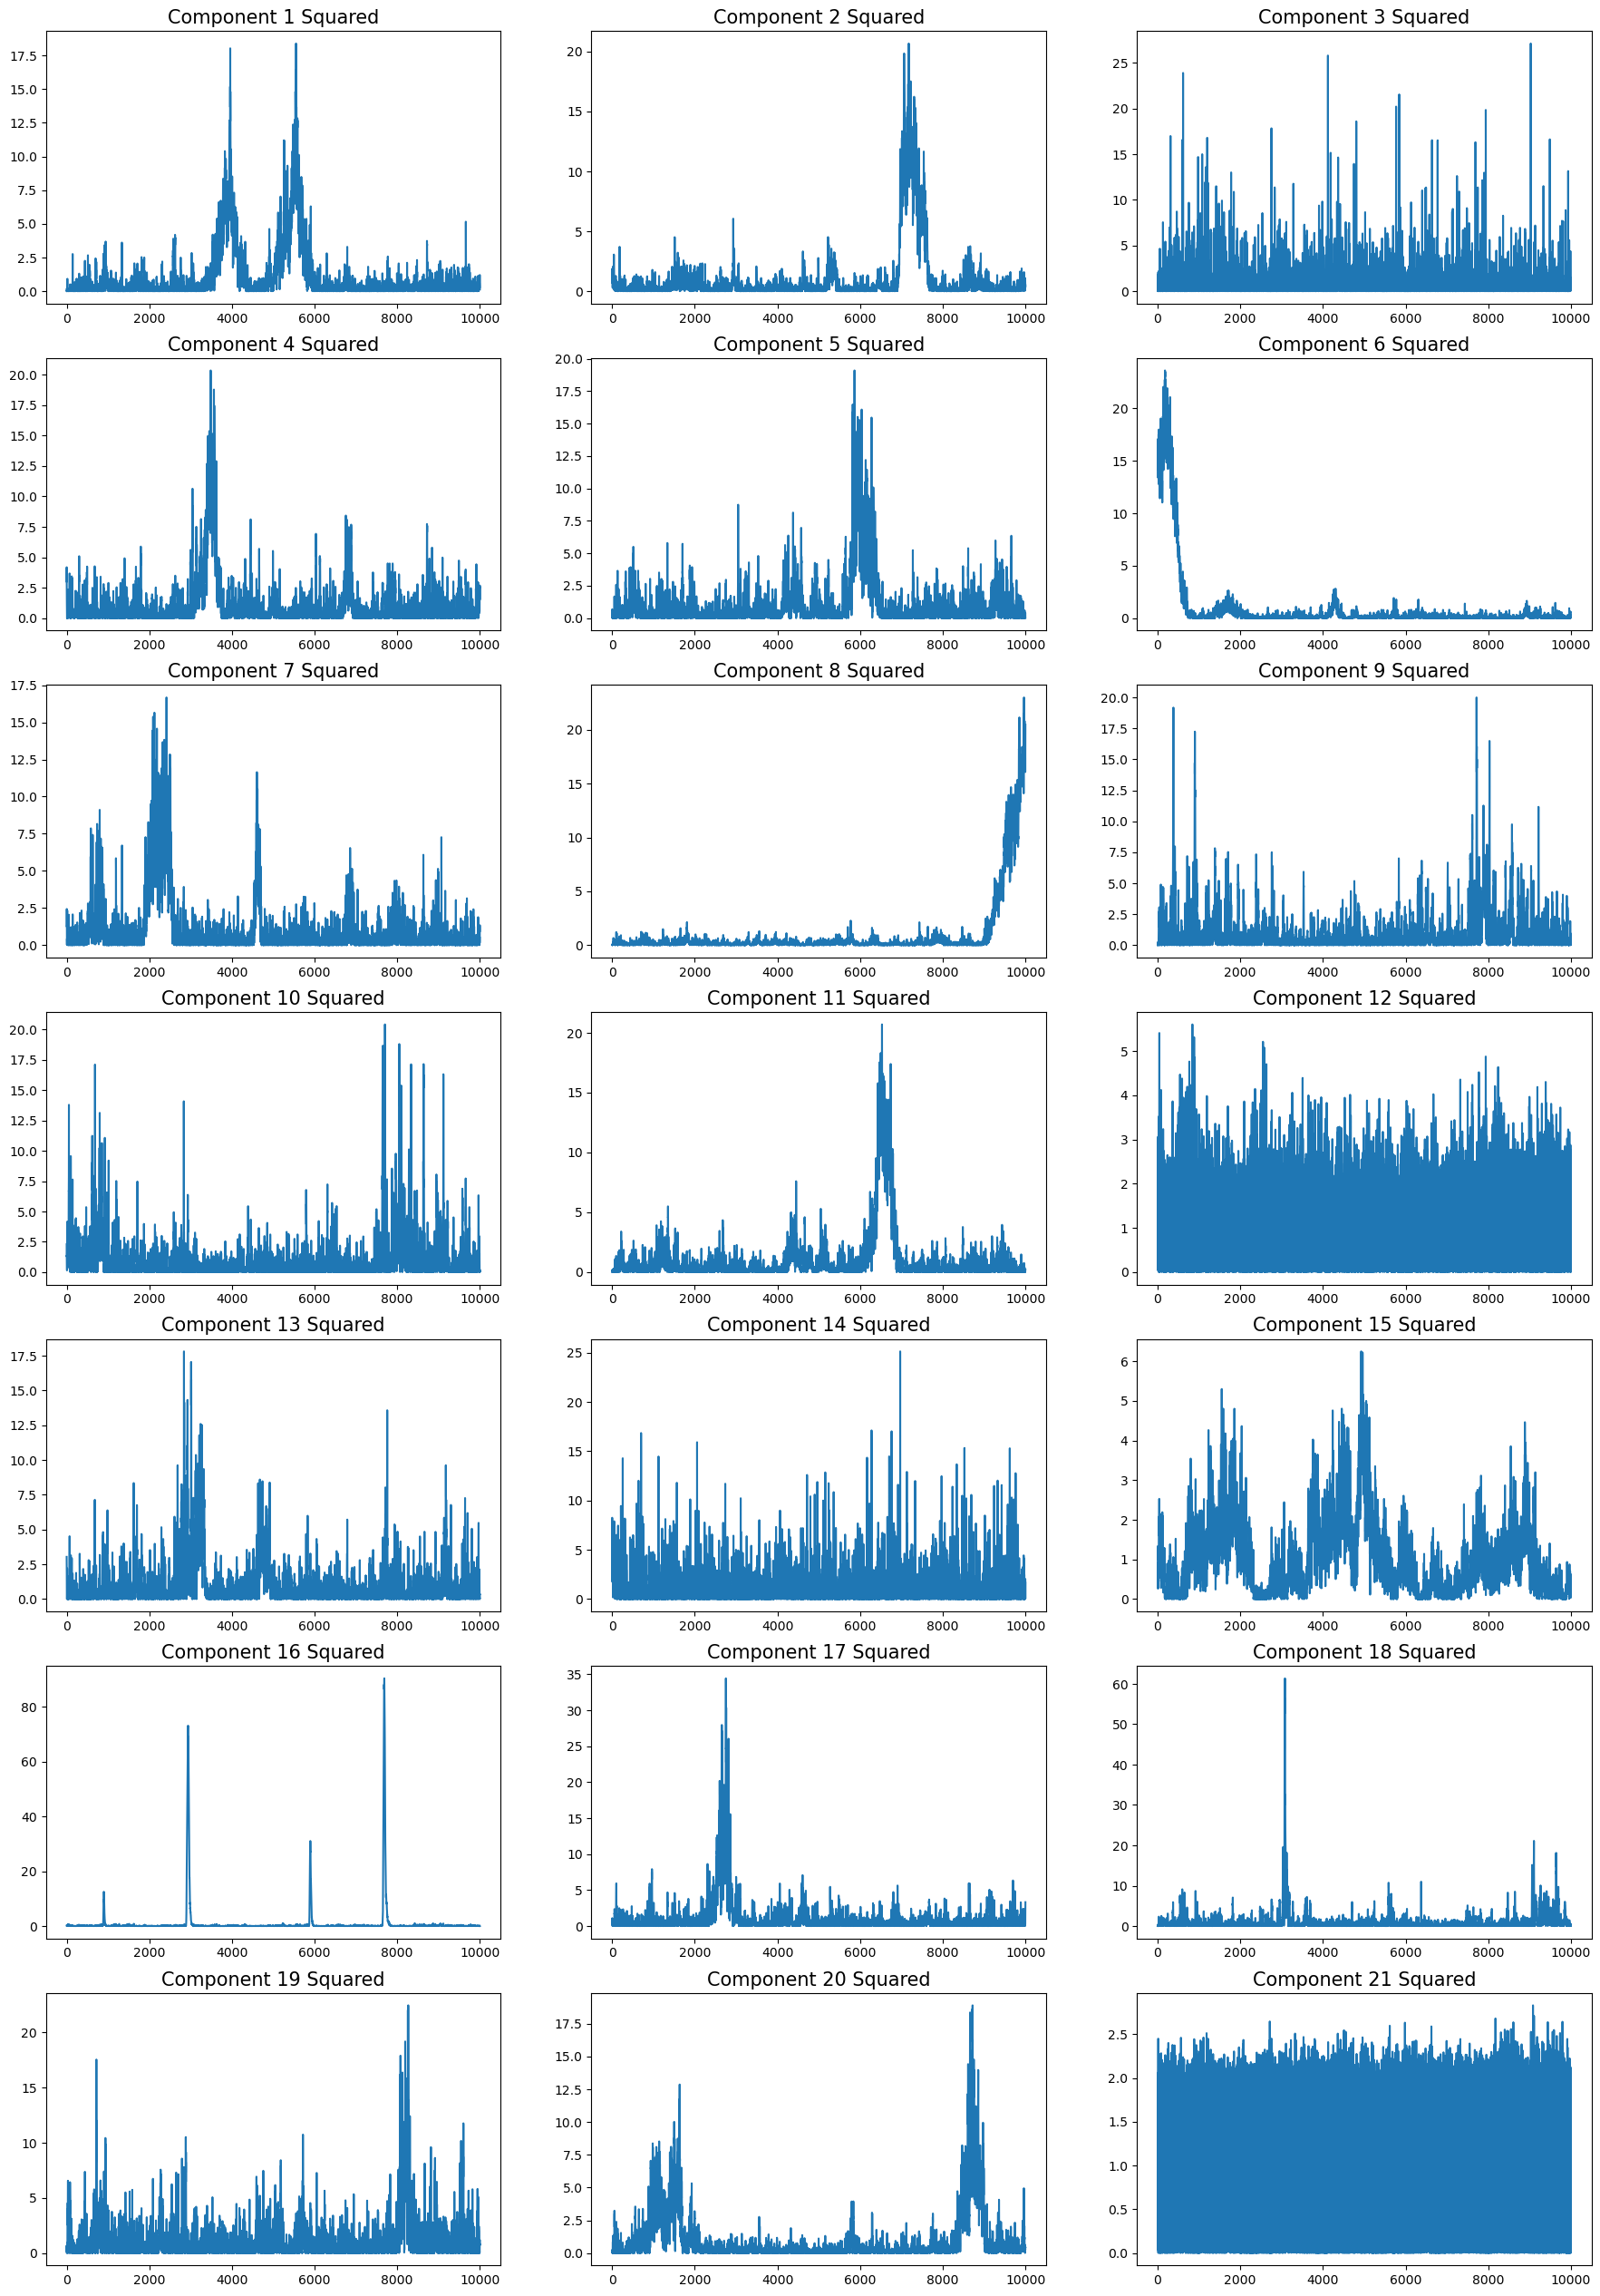

In [183]:
plt.figure(figsize=(22,32))
for i in range(data_ica.shape[1]):
    plt.subplot(7,3,i+1)
    plt.plot(data_ica_sq[:,i])
    plt.title(f'Component {i+1} Squared',fontsize=15)

## <span style="color:#4361EE">Hallando Artefactos de Parpadeo</span>

In [184]:
blinking = []
for i in range(n_components):
    pks = scipy.signal.find_peaks(data_ica[:,i]**2, distance=100,prominence=8)
    #print(i+1,pks)
    if len(pks[0])==4:
        blinking.append(i)
print(blinking)

[15, 16]


In [185]:
data_ica_clean = data_ica.copy()
data_ica_clean[:,blinking]=0

In [186]:
data_pca_no_blink = ica.inverse_transform(data_ica_clean)
data_no_blink = pca.inverse_transform(data_pca_no_blink)
data_no_blink_original = scaler.inverse_transform(data_no_blink)

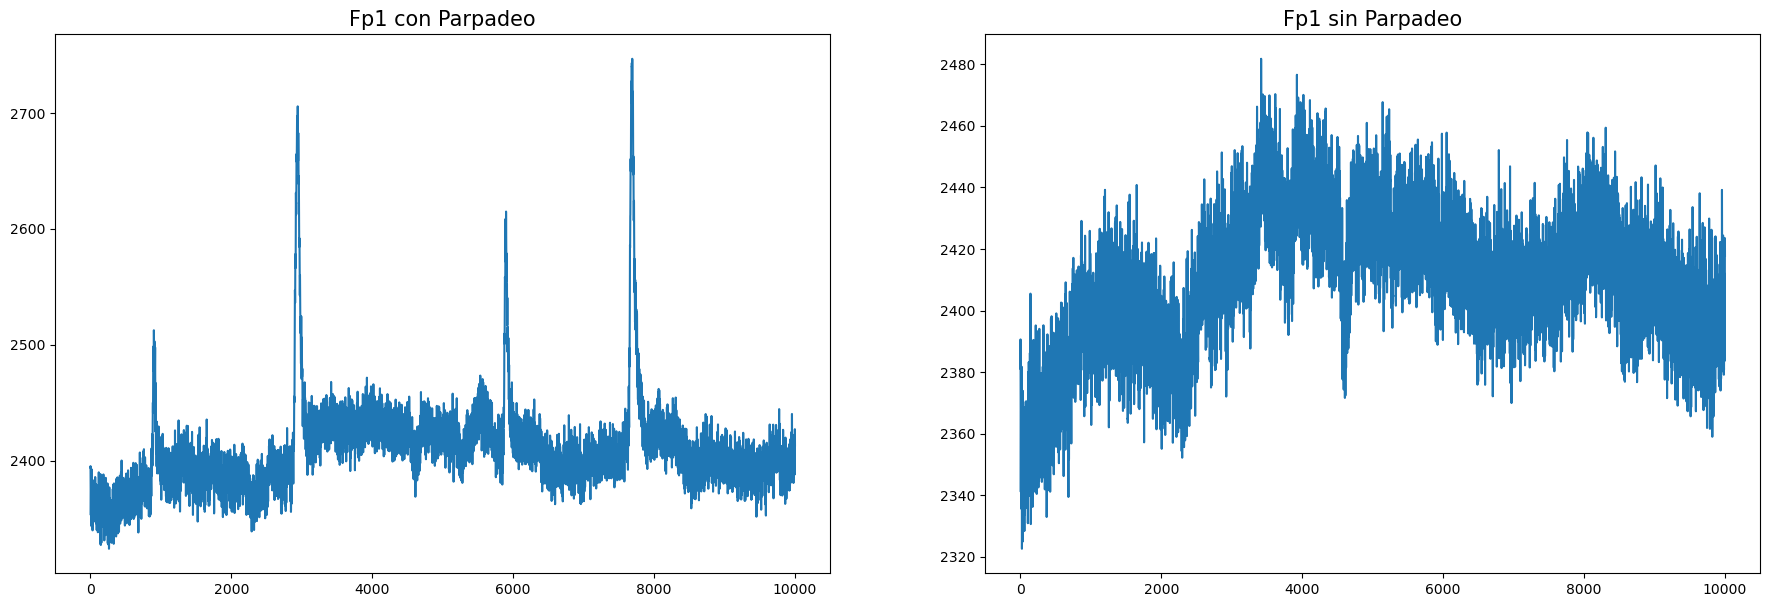

In [188]:
plt.figure(figsize=(22,7))
plt.subplot(121)
plt.plot(data[:,0])
plt.title('Fp1 con Parpadeo', fontsize=15);
plt.subplot(122)
plt.plot(data_no_blink_original[:,0])
plt.title('Fp1 sin Parpadeo', fontsize=15);